In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import daft

........AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


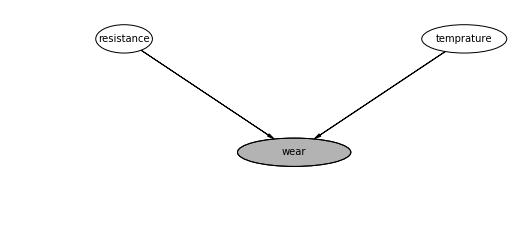

In [2]:
pgm = daft.PGM([9, 4], origin=[1, 0.5])
pgm.add_node(daft.Node('r', 'resistance', 3, 4, aspect=2))
pgm.add_node(daft.Node('t', 'temprature', 9, 4, aspect=3))
pgm.add_node(daft.Node('w', 'wear', 6, 2, aspect=4, observed=True))
pgm.add_edge('r', 'w')
pgm.add_edge('t', 'w')
pgm.render()



In [3]:
model = pm.Model();
with model:
    resistance = pm.Bernoulli('resistance',0.6)
   
    
    temprature = pm.Bernoulli('temprature',0.6)
    wear_prop = pm.Deterministic('wear_prop',pm.math.switch(resistance,pm.math.switch(temprature,0.6,0.5),pm.math.switch(temprature,0.5,0.4)))
    wear = pm.Bernoulli('wear',wear_prop)
    step= pm.BinaryGibbsMetropolis([resistance, temprature,wear]) 
    trace =pm.sample(100000,step=step,tune=5000, progressbar = True)
    
    

100%|████████████████████████████████| 105000/105000 [00:27<00:00, 3751.60it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DA21278>,
      dtype=object)

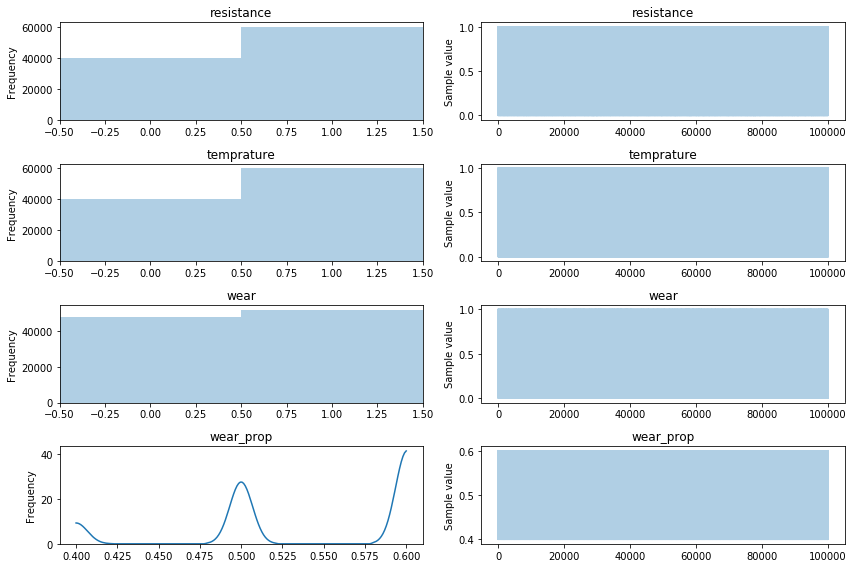

In [4]:
 pm.traceplot(trace)

In [5]:

dictionary = { 'resistance' :[1 if ii else 0 for ii in trace['resistance'].tolist()],
               'temprature' :[1 if ii  else 0 for ii in trace['temprature'].tolist()],
               'wear'     :[1 if ii else 0  for  ii in trace['wear'].tolist()],
               
              }

In [6]:
df=pd.DataFrame(dictionary)

In [7]:
prop_resistance_wear =float(df[(df['resistance']==1)& (df['wear']==1)].shape[0])/df[df['wear']==1].shape[0]
print(prop_resistance_wear)

0.6429643310631421


In [8]:
prop_temprature_wear =float(df[(df['temprature']==1)& (df['wear']==1)].shape[0])/df[df['wear']==1].shape[0]
print(prop_temprature_wear)

0.6462541844626573


In [9]:
prop_Not_temprature_resistance_wear =float(df[(df['temprature']==0)& (df['resistance']==0) & (df['wear']==1)].shape[0])/df[df['wear']==1].shape[0]
print(prop_Not_temprature_resistance_wear)

0.12511062372542228


In [10]:
prop_temprature_resistance_wear =float(df[(df['temprature']==1)& (df['resistance']==1) & (df['wear']==1)].shape[0])/df[df['wear']==1].shape[0]
print(prop_temprature_resistance_wear)

0.41432913925122167


In [27]:
model = pm.Model();
with model:
    resistance1 = pm.Bernoulli('resistance1',0.6)
    
    temp_prop1 = pm.Deterministic('temp_prop1',pm.math.switch(resistance1,0.6,0.4))
    temprature1 = pm.Bernoulli('temprature1',temp_prop1)
    wear_prop1 = pm.Deterministic('wear_prop1',pm.math.switch(resistance1,pm.math.switch(temprature1,0.6,0.5),pm.math.switch(temprature1,0.5,0.4)))
    wear1 = pm.Bernoulli('wear1',wear_prop1)
    step1= pm.BinaryGibbsMetropolis([resistance1, temprature1,wear1]) 
    trace1 =pm.sample(100000,step=step1,tune=5000, progressbar = True)
    
    

Assigned NUTS to resistance2_interval__
........AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|████████████████████████████████| 105000/105000 [01:18<00:00, 1338.36it/s]



resistance:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.601            0.490            0.001            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


temprature:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.600            0.490            0.001            [0.000, 1.000]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.000          0.000          1.000          1.000          1.000


wear:

  Mean             SD               MC Error         95% HPD interval
  ----------------

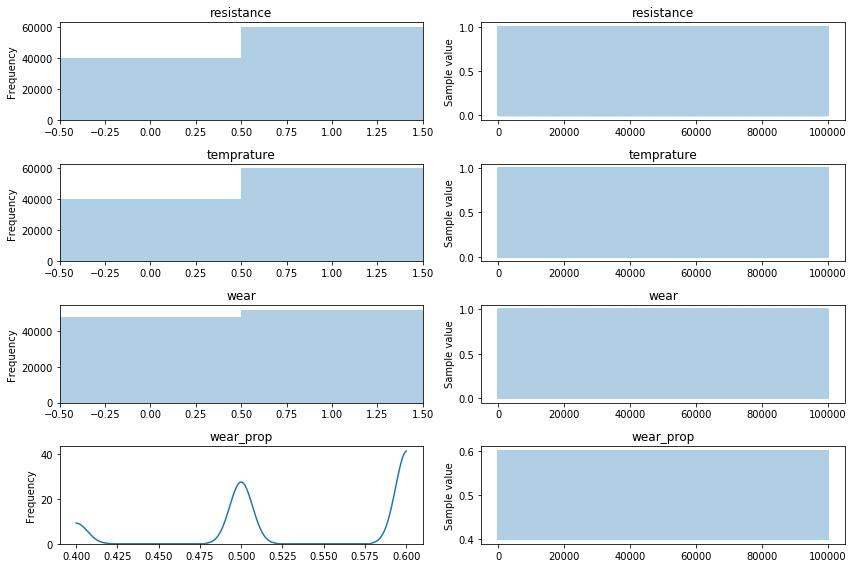

In [24]:
 pm.traceplot(trace1)
 
 pm.summary(trace1)

In [14]:
dictionary = { 'resistance1' :[1 if ii else 0 for ii in trace['resistance1'].tolist()],
               'temprature1' :[1 if ii  else 0 for ii in trace['temprature1'].tolist()],
               'wear1'     :[1 if ii else 0  for  ii in trace['wear1'].tolist()],
               
              }

In [15]:
df=pd.DataFrame(dictionary)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000176ABF28>,
      dtype=object)

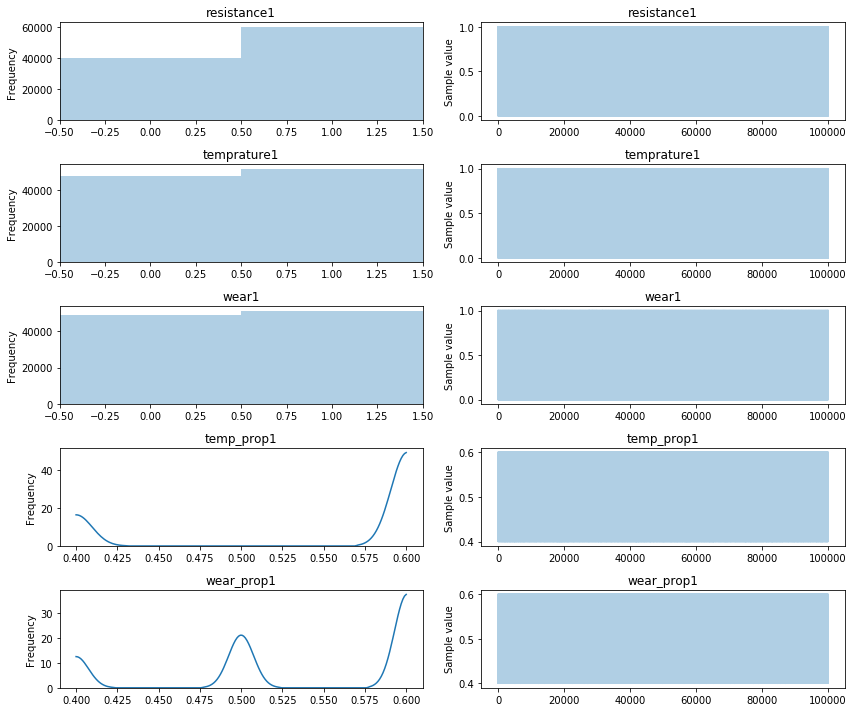

In [16]:
pm.traceplot(trace)

In [17]:
prop_resistance_wear1 =float(df[(df['resistance1']==1)& (df['wear1']==1)].shape[0])/df[df['wear1']==1].shape[0]
print(prop_resistance_wear1)

0.6558193105063834


In [18]:
prop_temprature_wear1 =float(df[(df['temprature1']==1)& (df['wear1']==1)].shape[0])/df[df['wear1']==1].shape[0]
print(prop_temprature_wear1)

0.5772068871276305
